In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as  plt
import seaborn as sns

import random
from random import sample

pd.set_option('display.max_columns', 1000)
from scipy.interpolate import interp1d
from scipy import interpolate as inter
import scipy.stats
from pandas.plotting import table 
import dataframe_image as dfi

from PIL import Image
pd.set_option('mode.chained_assignment',None)

In [2]:
metabolic = pd.read_csv('metabolic_corr.csv',index_col=0)
metabolic_p = pd.read_csv('metabolic_p.csv',index_col=0)


In [3]:
met_shape = metabolic.shape[0]
print(met_shape)

40


In [4]:
display(metabolic.head())
display(metabolic.tail())

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   

                                       TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                                    -0.011745   
TAdipose - SubcutaneousM032G001                                    -0.009905   
TAdipose - SubcutaneousM038G001                                    -0.324818   
TAdipose - Visceral (Omentum)M010G001                               1.000000   
TAdipose - Visceral (Omentum)M024G001                              -0.031693   

                                       TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                                    -0.138855   
TAdipose - SubcutaneousM032G001                                    -0.014830   
TAdipose - SubcutaneousM038G001                                     0.011537   
TAdipose - Visceral (Omentum)M010G001                              -0.031693   
TAdipose - Visceral (Omentum)M024G001                               1.000000   

                                       TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                                     0.134702   
TAdipose - SubcutaneousM032G001                                    -0.039940   
TAdipose - SubcutaneousM038G001                                    -0.094004   
TAdipose - Visceral (Omentum)M010G001                               0.411618   
TAdipose - Visceral (Omentum)M024G001                               0.215150   

                                       TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                       0.125879   
TAdipose - SubcutaneousM032G001                       0.145727   
TAdipose - SubcutaneousM038G001                      -0.275146   
TAdipose - Visceral (Omentum)M010G001                 0.458490   
TAdipose - Visceral (Omentum)M024G001                -0.084069   

                                       TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                      -0.189432   
TAdipose - SubcutaneousM032G001                      -0.055024   
TAdipose - SubcutaneousM038G001                      -0.079593   
TAdipose - Visceral (Omentum)M010G001                -0.078901   
TAdipose - Visceral (Omentum)M024G001                 0.138485   

                                       TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                      -0.121794   
TAdipose - SubcutaneousM032G001                      -0.101602   
TAdipose - SubcutaneousM038G001                      -0.141973   
TAdipose - Visceral (Omentum)M010G001                -0.084736   
TAdipose - Visceral (Omentum)M024G001                 0.024362   

                                       TArtery - TibialM026G001  \
TAd

TAdipose - SubcutaneousM003G001  \
TTestisM002G001                              0.008517   
TThyroidM018G001                             0.017593   
TThyroidM032G001                            -0.005457   
TWhole BloodM002G001                        -0.069071   
TWhole BloodM007G001                        -0.112304   

                      TAdipose - SubcutaneousM032G001  \
TTestisM002G001                             -0.094100   
TThyroidM018G001                             0.021687   
TThyroidM032G001                            -0.107820   
TWhole BloodM002G001                        -0.033059   
TWhole BloodM007G001                         0.130825   

                      TAdipose - SubcutaneousM038G001  \
TTestisM002G001                              0.094962   
TThyroidM018G001                            -0.231765   
TThyroidM032G001                             0.017032   
TWhole BloodM002G001                        -0.017585   
TWhole BloodM007G001                         0.034238   

                      TAdipose - Visceral (Omentum)M010G001  \
TTestisM002G001                                   -0.150914   
TThyroidM018G001                                   0.267051   
TThyroidM032G001                                   0.168284   
TWhole BloodM002G001                              -0.234466   
TWhole BloodM007G001                              -0.062777   

                      TAdipose - Visceral (Omentum)M024G001  \
TTestisM002G001                                   -0.129553   
TThyroidM018G001                                   0.066359   
TThyroidM032G001                                   0.165905   
TWhole BloodM002G001                              -0.058857   
TWhole BloodM007G001                               0.007039   

                      TAdipose - Visceral (Omentum)M025G001  \
TTestisM002G001                                   -0.170419   
TThyroidM018G001                                   0.251337   
TThyroidM032G001                                   0.272737   
TWhole BloodM002G001                              -0.217780   
TWhole BloodM007G001                              -0.101391   

                      TArtery - AortaM020G001  TArtery - AortaM029G001  \
TTestisM002G001                     -0.120693                 0.151744   
TThyroidM018G001                     0.245640                -0.042085   
TThyroidM032G001                     0.005337                -0.064978   
TWhole BloodM002G001                -0.078293                 0.106190   
TWhole BloodM007G001                -0.191490                -0.093302   

                      TArtery - AortaM031G001  TArtery - TibialM026G001  \
TTestisM002G001                     -0.043459                  0.037677   
TThyroidM018G001                     0.112908                 -0.150268   
TThyroidM032G001                     0.085136                 -0.207944   
TWhole BloodM002G001                 0.022292                 -0.155074   
TWhole BloodM007G001                 0.203131                 -0.022236   

                      TArtery - TibialM029G001  TArtery - TibialM035G001  \
TTestisM002G001                       0.035795                  0.102093   
TThyroidM018G001                      0.339950                  0.155750   
TThyroidM032G001                      0.142135                  0.080693   
TWhole BloodM002G001                 -0.199350                 -0.127404   
TWhole BloodM007G001                 -0.073533                 -0.082806   

                      TBreast - Mammary TissueM016G001  \
TTestisM002G001                               0.322654   
TThyroidM018G001                              0.048877   
TThyroidM032G001                              0.064226   
TWhole BloodM002G001                          0.028272   
TWhole BloodM007G001                         -0.053255   

                      TBreast - Mammary TissueM017G001  \
TTestisM002G001                               0.204458   
TThyroidM018G001                      

In [5]:
display(metabolic_p.head(3))
display(metabolic_p.tail(3))

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                     1.000000e+00   
TAdipose - SubcutaneousM032G001                     7.187480e-01   
TAdipose - SubcutaneousM038G001                     1.308679e-15   

                                 TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                         0.718748   
TAdipose - SubcutaneousM032G001                         1.000000   
TAdipose - SubcutaneousM038G001                         0.003188   

                                 TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                     1.308679e-15   
TAdipose - SubcutaneousM032G001                     3.188422e-03   
TAdipose - SubcutaneousM038G001                     1.000000e+00   

                                 TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                               0.897834   
TAdipose - SubcutaneousM032G001                               0.913772   
TAdipose - SubcutaneousM038G001                               0.000262   

                                 TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                               0.127180   
TAdipose - SubcutaneousM032G001                               0.871211   
TAdipose - SubcutaneousM038G001                               0.899637   

                                 TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                               0.139070   
TAdipose - SubcutaneousM032G001                               0.662270   
TAdipose - SubcutaneousM038G001                               0.303058   

                                 TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                 0.265875   
TAdipose - SubcutaneousM032G001                 0.197118   
TAdipose - SubcutaneousM038G001                 0.013507   

                                 TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                 0.092387   
TAdipose - SubcutaneousM032G001                 0.627840   
TAdipose - SubcutaneousM038G001                 0.482795   

                                 TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                 0.281828   
TAdipose - SubcutaneousM032G001                 0.369836   
TAdipose - SubcutaneousM038G001                 0.209030   

                                 TArtery - TibialM026G001  \
TAdipose - SubcutaneousM003G001              1.722750e-01   
TAdipose - SubcutaneousM032G001              2.042857e-03   
TAdipose - SubcutaneousM038G001              7.794057e-07   

                                 TArtery - TibialM029G001  \
TAdipose - SubcutaneousM003G001              7.472065e-01   
TAdipose - SubcutaneousM032G001              1.534104e-07   
TAdipose - SubcutaneousM038G001              2.514976e-07   

                                 TArtery - TibialM035G001  \
TAdipose - SubcutaneousM003G001                  0.024677   
TAdipose - SubcutaneousM032G001                  0.004489   
TAdipose - SubcutaneousM038G001                  0.542353   

                                 TBreast - Mammary TissueM016G001  \
TAdipose - SubcutaneousM003G001                          0.117292   
TAdipose - SubcutaneousM032G001                          0.836725   
TAdipose - SubcutaneousM038G001                          0.951757   

                                 TBreast - Mammary TissueM017G001  \
TAdipose - SubcutaneousM003G001                          0.027163   
TAdipose - SubcutaneousM032G001                          0.501189   
TAdipose - SubcutaneousM038G001                          0.413960   

                                 TCells - Cultured fibroblastsM002G001  \
TAdipose - SubcutaneousM003G001                               0.783771   
TAdipose - SubcutaneousM032G001                               0.180331   
TAdipose - SubcutaneousM038G001                               0.802734   

              

TAdipose - SubcutaneousM003G001  \
TThyroidM032G001                             0.947699   
TWhole BloodM002G001                         0.388499   
TWhole BloodM007G001                         0.160056   

                      TAdipose - SubcutaneousM032G001  \
TThyroidM032G001                             0.193642   
TWhole BloodM002G001                         0.680081   
TWhole BloodM007G001                         0.101331   

                      TAdipose - SubcutaneousM038G001  \
TThyroidM032G001                             0.837764   
TWhole BloodM002G001                         0.826413   
TWhole BloodM007G001                         0.669326   

                      TAdipose - Visceral (Omentum)M010G001  \
TThyroidM032G001                                   0.066166   
TWhole BloodM002G001                               0.007972   
TWhole BloodM007G001                               0.483204   

                      TAdipose - Visceral (Omentum)M024G001  \
TThyroidM032G001                                   0.070149   
TWhole BloodM002G001                               0.510988   
TWhole BloodM007G001                               0.937392   

                      TAdipose - Visceral (Omentum)M025G001  \
TThyroidM032G001                                    0.00258   
TWhole BloodM002G001                                0.01391   
TWhole BloodM007G001                                0.25669   

                      TArtery - AortaM020G001  TArtery - AortaM029G001  \
TThyroidM032G001                     0.960414                 0.545197   
TWhole BloodM002G001                 0.468411                 0.324776   
TWhole BloodM007G001                 0.073900                 0.387245   

                      TArtery - AortaM031G001  TArtery - TibialM026G001  \
TThyroidM032G001                     0.427628                  0.013019   
TWhole BloodM002G001                 0.836670                  0.052466   
TWhole BloodM007G001                 0.057678                  0.782222   

                      TArtery - TibialM029G001  TArtery - TibialM035G001  \
TThyroidM032G001                      0.091538                  0.339767   
TWhole BloodM002G001                  0.012312                  0.111814   
TWhole BloodM007G001                  0.360064                  0.302522   

                      TBreast - Mammary TissueM016G001  \
TThyroidM032G001                              0.536343   
TWhole BloodM002G001                          0.775729   
TWhole BloodM007G001                          0.591324   

                      TBreast - Mammary TissueM017G001  \
TThyroidM032G001                              0.148038   
TWhole BloodM002G001                          0.986057   
TWhole BloodM007G001                          0.283160   

                      TCells - Cultured fibroblastsM002G001  \
TThyroidM032G001                                   0.297832   
TWhole BloodM002G001                               0.676523   
TWhole BloodM007G001                               0.818655   

                      TEsophagus - MucosaM022G001  \
TThyroidM032G001                         0.024614   
TWhole BloodM002G001                     0.924790   
TWhole BloodM007G001                     0.211932   

                      TEsophagus - MuscularisM019G001  \
TThyroidM032G001                             0.049675   
TWhole BloodM002G001                         0.674501   
TWhole BloodM007G001                         0.266480   

                      TEsophagus - MuscularisM035G001  \
TThyroidM032G001                             0.054613   
TWhole BloodM002G001                         0.243044   
TWhole BloodM007G001                         0.899848   

                      THeart - Atrial AppendageM003G001  \
TThyroidM032G001                               0.731960   
TWhole BloodM002G001                           0.079121   
TWhole BloodM007G001                           0.283911   

                      THeart - Atrial Appendag

In [6]:
corr_thresholds = list(range(5, 255, 5))
myInt = 5000
corr_thresholds[:] = [x / myInt for x in corr_thresholds]
print(corr_thresholds)
print(len(corr_thresholds))

pos_cases = [0]*50
neg_cases = [0]*50
random_cases = [0]*50





[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]
50


In [7]:
#corrlist = []

met_corrlist = []
met_plist = []

metabolic_indexes = metabolic.index.tolist()
metabolic_columns = metabolic.columns.tolist()

for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        if meti !=metj:
            met_corrlist.append(metabolic.iloc[i,j])
            met_plist.append(metabolic_p.iloc[i,j])
        
inter_met_corr = len(met_corrlist)
print(inter_met_corr)



751


In [8]:
d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'random expectation' : random_cases
     }
     
df_p = pd.DataFrame(d)

display(df_p)

                   
        

corr thresholds  pos cases  neg cases  random expectation
0             0.001          0          0                   0
1             0.002          0          0                   0
2             0.003          0          0                   0
3             0.004          0          0                   0
4             0.005          0          0                   0
5             0.006          0          0                   0
6             0.007          0          0                   0
7             0.008          0          0                   0
8             0.009          0          0                   0
9             0.010          0          0                   0
10            0.011          0          0                   0
11            0.012          0          0                   0
12            0.013          0          0                   0
13            0.014          0          0                   0
14            0.015          0          0                   0
15            0.016          0          0                   0
16            0.017          0          0                   0
17            0.018          0          0                   0
18            0.019          0          0                   0
19            0.020          0          0                   0
20            0.021          0          0                   0
21            0.022          0          0                   0
22            0.023          0          0                   0
23            0.024          0          0                   0
24            0.025          0          0                   0
25            0.026          0          0                   0
26            0.027          0          0                   0
27            0.028          0          0                   0
28            0.029          0          0                   0
29            0.030          0          0                   0
30            0.031          0          0                   0
31            0.032          0          0                   0
32            0.033          0          0                   0
33            0.034          0          0                   0
34            0.035          0          0                   0
35            0.036          0          0                   0
36            0.037          0          0                   0
37            0.038          0          0                   0
38            0.039          0          0                   0
39            0.040          0          0                   0
40            0.041          0          0                   0
41            0.042          0          0                   0
42            0.043          0          0                   0
43            0.044          0          0                   0
44            0.045          0          0                   0
45            0.046          0          0                   0
46            0.047          0          0                   0
47            0.048          0          0                   0
48            0.049          0          0                   0
49            0.050          0          0                   0

In [9]:
display(metabolic_p.head(3))

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                     1.000000e+00   
TAdipose - SubcutaneousM032G001                     7.187480e-01   
TAdipose - SubcutaneousM038G001                     1.308679e-15   

                                 TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                         0.718748   
TAdipose - SubcutaneousM032G001                         1.000000   
TAdipose - SubcutaneousM038G001                         0.003188   

                                 TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                     1.308679e-15   
TAdipose - SubcutaneousM032G001                     3.188422e-03   
TAdipose - SubcutaneousM038G001                     1.000000e+00   

                                 TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                               0.897834   
TAdipose - SubcutaneousM032G001                               0.913772   
TAdipose - SubcutaneousM038G001                               0.000262   

                                 TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                               0.127180   
TAdipose - SubcutaneousM032G001                               0.871211   
TAdipose - SubcutaneousM038G001                               0.899637   

                                 TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                               0.139070   
TAdipose - SubcutaneousM032G001                               0.662270   
TAdipose - SubcutaneousM038G001                               0.303058   

                                 TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                 0.265875   
TAdipose - SubcutaneousM032G001                 0.197118   
TAdipose - SubcutaneousM038G001                 0.013507   

                                 TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                 0.092387   
TAdipose - SubcutaneousM032G001                 0.627840   
TAdipose - SubcutaneousM038G001                 0.482795   

                                 TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                 0.281828   
TAdipose - SubcutaneousM032G001                 0.369836   
TAdipose - SubcutaneousM038G001                 0.209030   

                                 TArtery - TibialM026G001  \
TAdipose - SubcutaneousM003G001              1.722750e-01   
TAdipose - SubcutaneousM032G001              2.042857e-03   
TAdipose - SubcutaneousM038G001              7.794057e-07   

                                 TArtery - TibialM029G001  \
TAdipose - SubcutaneousM003G001              7.472065e-01   
TAdipose - SubcutaneousM032G001              1.534104e-07   
TAdipose - SubcutaneousM038G001              2.514976e-07   

                                 TArtery - TibialM035G001  \
TAdipose - SubcutaneousM003G001                  0.024677   
TAdipose - SubcutaneousM032G001                  0.004489   
TAdipose - SubcutaneousM038G001                  0.542353   

                                 TBreast - Mammary TissueM016G001  \
TAdipose - SubcutaneousM003G001                          0.117292   
TAdipose - SubcutaneousM032G001                          0.836725   
TAdipose - SubcutaneousM038G001                          0.951757   

                                 TBreast - Mammary TissueM017G001  \
TAdipose - SubcutaneousM003G001                          0.027163   
TAdipose - SubcutaneousM032G001                          0.501189   
TAdipose - SubcutaneousM038G001                          0.413960   

                                 TCells - Cultured fibroblastsM002G001  \
TAdipose - SubcutaneousM003G001                               0.783771   
TAdipose - SubcutaneousM032G001                               0.180331   
TAdipose - SubcutaneousM038G001                               0.802734   

              

In [10]:
for i in range(df_p.shape[0]):
    count_pos = 0
    count_neg = 0
    for j in range(len(met_corrlist)):
        if met_corrlist[j] >= 0:
            if met_plist[j] < df_p['corr thresholds'].iloc[i]:
                count_pos +=1
    for j in range(len(met_corrlist)):
        if met_corrlist[j] <= 0:
            if met_plist[j] < df_p['corr thresholds'].iloc[i]:
                count_neg +=1
            
    df_p['pos cases'].iloc[i] = count_pos
    df_p['neg cases'].iloc[i] = count_neg
    #df_p['ratio pos neg'].iloc[i] = count_pos / max(count_neg,1)
df_p['ratio']  = df_p['pos cases'] / df_p['neg cases']
df_p['random expectation'] = inter_met_corr * df_p['corr thresholds']

display(df_p.head(26))

corr thresholds  pos cases  neg cases  random expectation     ratio
0             0.001         16          8               0.751  2.000000
1             0.002         21          8               1.502  2.625000
2             0.003         26         11               2.253  2.363636
3             0.004         29         13               3.004  2.230769
4             0.005         31         15               3.755  2.066667
5             0.006         34         15               4.506  2.266667
6             0.007         36         15               5.257  2.400000
7             0.008         37         16               6.008  2.312500
8             0.009         39         16               6.759  2.437500
9             0.010         39         19               7.510  2.052632
10            0.011         43         19               8.261  2.263158
11            0.012         43         19               9.012  2.263158
12            0.013         44         21               9.763  2.095238
13            0.014         44         24              10.514  1.833333
14            0.015         45         25              11.265  1.800000
15            0.016         45         26              12.016  1.730769
16            0.017         45         27              12.767  1.666667
17            0.018         47         28              13.518  1.678571
18            0.019         49         29              14.269  1.689655
19            0.020         49         29              15.020  1.689655
20            0.021         50         30              15.771  1.666667
21            0.022         50         30              16.522  1.666667
22            0.023         52         32              17.273  1.625000
23            0.024         54         35              18.024  1.542857
24            0.025         56         36              18.775  1.555556
25            0.026         56         36              19.526  1.555556

In [11]:
tissue_key = pd.read_csv('IncludedTissuesSelect.csv',index_col=0)
display(tissue_key.head(19))

tissue_key_index_list = tissue_key.index.tolist()
data_frames = []
for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    print(current)

Quantity
Tissue Type                                  
Adipose - Subcutaneous                      3
Adipose - Visceral (Omentum)                3
Artery - Aorta                              3
Artery - Tibial                             3
Breast - Mammary Tissue                     2
Cells - Cultured fibroblasts                1
Esophagus - Mucosa                          1
Esophagus - Muscularis                      2
Heart - Atrial Appendage                    2
Heart - Left Ventricle                      1
Liver                                       3
Lung                                        4
Muscle - Skeletal                           1
Nerve - Tibial                              2
Skin - Not Sun Exposed (Suprapubic)         2
Skin - Sun Exposed (Lower leg)              2
Testis                                      1
Thyroid                                     2
Whole Blood                                 2

TAdipose - Subcutaneous_df.csv
TAdipose - Visceral (Omentum)_df.csv
TArtery - Aorta_df.csv
TArtery - Tibial_df.csv
TBreast - Mammary Tissue_df.csv
TCells - Cultured fibroblasts_df.csv
TEsophagus - Mucosa_df.csv
TEsophagus - Muscularis_df.csv
THeart - Atrial Appendage_df.csv
THeart - Left Ventricle_df.csv
TLiver_df.csv
TLung_df.csv
TMuscle - Skeletal_df.csv
TNerve - Tibial_df.csv
TSkin - Not Sun Exposed (Suprapubic)_df.csv
TSkin - Sun Exposed (Lower leg)_df.csv
TTestis_df.csv
TThyroid_df.csv
TWhole Blood_df.csv


In [12]:
tissue_key_index_list = tissue_key.index.tolist()
data_frames = []


for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    data_frames.append(current)

tissue_key['DataFrames'] = data_frames
display(tissue_key.head())

Quantity                            DataFrames
Tissue Type                                                                 
Adipose - Subcutaneous               3        TAdipose - Subcutaneous_df.csv
Adipose - Visceral (Omentum)         3  TAdipose - Visceral (Omentum)_df.csv
Artery - Aorta                       3                TArtery - Aorta_df.csv
Artery - Tibial                      3               TArtery - Tibial_df.csv
Breast - Mammary Tissue              2       TBreast - Mammary Tissue_df.csv

In [13]:
def select_subset(seedbasis):
    modules = []
    for i in range(tissue_key.shape[0]):
        current_seed = seedbasis+i
        sample_size = tissue_key['Quantity'].iloc[i]
        current_df = tissue_key['DataFrames'].iloc[i]
        df = pd.read_csv(current_df,index_col=0)
        df = df.sample(random_state=current_seed, n=sample_size, axis=1)
        df_columns = df.columns.tolist()
        for j in range(len(df_columns)):
            modules.append(df_columns[j])
        #print(modules)
        #print(len(modules))
    return(modules)

a = select_subset(2000)
print(a)

['TAdipose - SubcutaneousM006G002', 'TAdipose - SubcutaneousM018G006', 'TAdipose - SubcutaneousM012G099', 'TAdipose - Visceral (Omentum)M022G005', 'TAdipose - Visceral (Omentum)M009G006', 'TAdipose - Visceral (Omentum)M023G005', 'TArtery - AortaM022G099', 'TArtery - AortaM036G099', 'TArtery - AortaM049G099', 'TArtery - TibialM023G002', 'TArtery - TibialM028G099', 'TArtery - TibialM020G099', 'TBreast - Mammary TissueM001G002', 'TBreast - Mammary TissueM014G005', 'TCells - Cultured fibroblastsM003G006', 'TEsophagus - MucosaM021G006', 'TEsophagus - MuscularisM027G005', 'TEsophagus - MuscularisM008G002', 'THeart - Atrial AppendageM016G003', 'THeart - Atrial AppendageM021G003', 'THeart - Left VentricleM015G002', 'TLiverM034G099', 'TLiverM037G006', 'TLiverM006G006', 'TLungM003G004', 'TLungM020G006', 'TLungM017G006', 'TLungM002G099', 'TMuscle - SkeletalM014G006', 'TNerve - TibialM049G099', 'TNerve - TibialM046G099', 'TSkin - Not Sun Exposed (Suprapubic)M010G006', 'TSkin - Not Sun Exposed (Sup

In [14]:
all_corrs = pd.read_csv('big_corr.csv',index_col=0)
print(all_corrs.shape)


(609, 609)


In [15]:
all_ps = pd.read_csv('big_p.csv',index_col=0)
print(all_ps.shape)

(609, 609)


In [16]:
all_corrs_values = []
all_p_values = []

big_indexes = all_corrs.index.tolist()
big_columns = all_corrs.columns.tolist()



for i in range(all_corrs.shape[0]):
    for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        if alli !=allj:
            all_corrs_values.append(all_corrs.iloc[i,j])
            all_p_values.append(all_ps.iloc[i,j])
            
        
            
        
            
print(len(all_corrs_values))


174012


In [17]:
def make_smaller_df(df_cor,df_pvalue,random_state_seed):
    
    sub_corrs = select_subset(random_state_seed)
    #print(sub_corrs)
    
    df1_cor = df_cor.copy(deep=True)
    df1_p = df_pvalue.copy(deep=True)
    df1_cor =  df1_cor[sub_corrs]
    df1_cor = df1_cor.loc[sub_corrs]
    df1_p =  df1_p[sub_corrs]
    df1_p = df1_p.loc[sub_corrs]
    
    
    
    
    
    

    return df1_cor, df1_p

df1_c, df2_p = make_smaller_df(all_corrs,all_ps,1000)
print(df1_c.shape)
print(df2_p.shape)





    


(40, 40)
(40, 40)


In [18]:
def one_iteration_subsample(df,df_p,random_state_seed):
    
    
    df2, df2_p = make_smaller_df(df,df_p,random_state_seed)
    

    df2_index = df2.index.tolist()
    df2_columns = df2.columns.tolist()
    
    corr2list = []
    corr2p = []
    
    '''
    for i in range(all_corrs.shape[0]):
        for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        if alli !=allj:
            all_corrs_values.append(all_corrs.iloc[i,j])
            all_p_values.append(all_ps.iloc[i,j])
    '''
    
    
    for i in range(df2.shape[0]):
        for j in range(i+1,df2.shape[1]):
            alli = df2_index[i]
            allj = df2_columns[j]
            alli = alli[1:-8]
            allj = allj[1:-8]
                
            if alli !=allj:
            
                corr2list.append(df2.iloc[i,j])
                corr2p.append(df2_p.iloc[i,j])
    
            
    corr_thresholds = list(range(5, 251, 5))
    myInt = 5000
    corr_thresholds[:] = [x / myInt for x in corr_thresholds]
    #print(corr_thresholds)
    #print(len(corr_thresholds))

    pos_cases = [0]*50
    neg_cases = [0]*50
    ratios = [0]*50

    
    '''        
    corr_thresholds = list(range(1, 21, 1))
    myInt = 400
    corr_thresholds[:] = [x / myInt for x in corr_thresholds]
    #print(corr_thresholds)
    #print(len(corr_thresholds))


    pos_cases = [0]*20
    neg_cases = [0]*20
    ratios = [0]*20
    '''
    
    
    d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,    
     'ratios'    : ratios
         
     }
     
    df_p = pd.DataFrame(d)
   


    for i in range(df_p.shape[0]):
        count_pos = 0
        count_neg = 0
        for j in range(len(corr2list)):
            if corr2list[j] >= 0:
                if corr2p[j] < df_p['corr thresholds'].iloc[i]:
                    count_pos +=1
                
            #if corr2list[j] >= df_metabolic['corr thresholds'].iloc[i]:
            #    count_pos +=1
        for j in range(len(corr2list)):
            if corr2list[j] <= 0:
                if corr2p[j] < df_p['corr thresholds'].iloc[i]:
                    count_neg +=1
            
        df_p['pos cases'].iloc[i] = count_pos
        df_p['neg cases'].iloc[i] = count_neg
        #df_corr_stats['ratio pos neg'].iloc[i] = count_pos / max(1,count_neg)
    df_p['ratios'] = df_p['pos cases'] / df_p['neg cases']
    #print('iteration')
    #print(df_p.shape)
    #print(len(corr2list))
    return df_p






In [19]:
corr_big_list = []
pos_big_list = []
neg_big_list = []
ratio_big_list = []



for k in range(1000):
    if (k % 100 == 0):
        print (k)
    k_times1000 = k*1000
    df_stats = one_iteration_subsample(all_corrs,all_ps,k_times1000 )
    threshold = df_stats['corr thresholds'].tolist()
    positives = df_stats['pos cases'].tolist()
    negatives = df_stats['neg cases'].tolist()
    ratios = df_stats['ratios'].tolist()
    corr_big_list = corr_big_list+threshold
    pos_big_list = pos_big_list+positives
    neg_big_list = neg_big_list+negatives
    ratio_big_list = ratio_big_list + ratios

#print(len(corr_big_list))
    
    
   

0
100
200
300
400
500
600
700
800
900


In [20]:
display(df_stats.max())

corr thresholds     0.050000
pos cases          71.000000
neg cases          62.000000
ratios              1.163934
dtype: float64

In [21]:
display(df_stats.min())

corr thresholds     0.001000
pos cases          12.000000
neg cases          18.000000
ratios              0.608696
dtype: float64

In [22]:
print(df_stats.shape)

(50, 4)


In [23]:
d = {'corr thresholds' : corr_big_list, 
     'pos cases' : pos_big_list,
     'neg cases' : neg_big_list,
     'ratios' : ratio_big_list
     }
     
df_corr_stats = pd.DataFrame(d)
print(df_corr_stats.shape)
display(df_corr_stats.head(3))
display(df_corr_stats.tail(4))



(50000, 4)


corr thresholds  pos cases  neg cases    ratios
0            0.001         25         22  1.136364
1            0.002         29         33  0.878788
2            0.003         34         35  0.971429

corr thresholds  pos cases  neg cases    ratios
49996            0.047         71         61  1.163934
49997            0.048         71         61  1.163934
49998            0.049         71         61  1.163934
49999            0.050         71         62  1.145161

In [24]:
display(df_corr_stats.max())

corr thresholds      0.05
pos cases          113.00
neg cases          110.00
ratios                inf
dtype: float64

In [25]:
display(df_corr_stats.min())

corr thresholds    0.001000
pos cases          1.000000
neg cases          0.000000
ratios             0.142857
dtype: float64

In [26]:
print(df_corr_stats.shape)

(50000, 4)


In [27]:
df_corr_stats.replace([np.inf, -np.inf], 1, inplace=True)

In [28]:
quantile95 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)

In [29]:
quantile90 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [30]:
display(quantile90.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.001                 21.0       21.0  2.000000
0.002                 26.0       25.0  1.802353
0.003                 29.0       28.0  1.666667
0.004                 31.0       31.0  1.651667
0.005                 34.0       33.0  1.600000
0.006                 35.1       35.0  1.565839
0.007                 37.1       37.0  1.482000
0.008                 39.0       39.0  1.440444
0.009                 40.0       41.0  1.409091
0.010                 42.0       42.0  1.417308
0.011                 43.0       43.0  1.407407
0.012                 44.0       44.0  1.409091
0.013                 46.0       46.0  1.400741
0.014                 47.0       47.0  1.400909
0.015                 48.0       48.0  1.400541
0.016                 49.0       49.0  1.379310
0.017                 51.0       51.0  1.363636
0.018                 51.1       52.0  1.370370
0.019                 53.0       53.0  1.368616
0.020                 54.0       54.0  1.375000
0.021                 55.0       55.0  1.361364
0.022                 56.0       56.0  1.348953
0.023                 57.0       57.0  1.352941
0.024                 58.0       58.0  1.333333
0.025                 60.0       59.0  1.340594
0.026                 60.1       60.0  1.343858
0.027                 61.0       61.0  1.340474
0.028                 62.0       62.0  1.333333
0.029                 63.0       63.0  1.342998
0.030                 64.0       63.0  1.333333
0.031                 64.0       65.0  1.341528
0.032                 65.0       65.0  1.341463
0.033                 66.0       66.0  1.340529
0.034                 67.0       67.0  1.315918

In [31]:
display(quantile95.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.001                25.00      24.00  3.000000
0.002                30.00      28.05  2.301667
0.003                33.00      32.00  2.000000
0.004                36.00      35.00  1.910065
0.005                38.00      37.00  1.923077
0.006                40.00      39.00  1.875368
0.007                42.00      41.00  1.800000
0.008                43.00      43.00  1.700000
0.009                45.00      45.00  1.684615
0.010                47.00      46.00  1.684375
0.011                48.00      48.00  1.632353
0.012                49.00      49.00  1.576923
0.013                51.00      51.00  1.563221
0.014                52.00      51.00  1.562946
0.015                53.00      54.00  1.550086
0.016                54.00      55.00  1.521419
0.017                55.00      56.00  1.538622
0.018                57.00      57.00  1.484677
0.019                58.00      58.00  1.500000
0.020                59.00      59.05  1.500000
0.021                59.05      60.00  1.500000
0.022                60.00      61.00  1.500000
0.023                62.00      62.00  1.488953
0.024                63.00      63.00  1.448719
0.025                64.00      64.00  1.441340
0.026                65.00      64.00  1.461676
0.027                66.00      65.05  1.448939
0.028                67.00      67.00  1.439800
0.029                68.00      67.00  1.473913
0.030                68.00      69.00  1.466771
0.031                70.00      69.00  1.458333
0.032                71.00      70.00  1.454735
0.033                72.00      71.00  1.444444
0.034                72.05      72.00  1.444803

In [32]:
df_all_corr_averages = df_corr_stats.groupby('corr thresholds').mean()

df_all_corr_std = df_corr_stats.groupby('corr thresholds').std()

df_all_corr_std.rename(columns = {'pos cases':'pos std', 
                                  'neg cases':'neg std',
                                  'ratios' : 'ratio std'}, inplace = True)

df_all = pd.concat([df_all_corr_averages, df_all_corr_std], join="inner",axis=1)

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] < 1:
        df_all['neg cases'].iloc[i] = 1
        
        


df_all['pos lower'] = df_all['pos cases'] - df_all['pos std']
df_all['pos higher'] = df_all['pos cases'] + df_all['pos std']
df_all['neg lower'] = df_all['neg cases'] - df_all['neg std']
df_all['neg higher'] = df_all['neg cases'] + df_all['neg std']



df_all['ratios'] = df_all['pos cases'] / df_all['neg cases']
display(df_all)

pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.001               13.099     12.079  1.084444   6.391874   6.211227   
0.002               16.312     15.425  1.057504   7.148689   7.145729   
0.003               18.834     17.952  1.049131   7.760584   7.694862   
0.004               20.878     20.088  1.039327   8.134451   8.154186   
0.005               22.722     21.857  1.039575   8.455425   8.528498   
0.006               24.322     23.474  1.036125   8.755968   8.833196   
0.007               25.758     25.199  1.022183   9.130323   9.096821   
0.008               26.931     26.819  1.004176   9.335169   9.339136   
0.009               28.227     28.111  1.004126   9.516093   9.587523   
0.010               29.346     29.249  1.003316   9.775369   9.803832   
0.011               30.469     30.491  0.999278   9.890544   9.918281   
0.012               31.499     31.533  0.998922  10.029087  10.073350   
0.013               32.681     32.614  1.002054  10.218986  10.287509   
0.014               33.831     33.711  1.003560  10.305078  10.441863   
0.015               34.854     34.845  1.000258  10.389544  10.646141   
0.016               35.816     35.821  0.999860  10.518497  10.738635   
0.017               36.808     36.865  0.998454  10.689219  10.916499   
0.018               37.912     37.815  1.002565  10.782138  10.954030   
0.019               38.917     38.664  1.006544  10.901328  11.111821   
0.020               39.907     39.515  1.009920  10.977470  11.237618   
0.021               40.817     40.289  1.013105  11.123095  11.320231   
0.022               41.676     41.059  1.015027  11.242839  11.397694   
0.023               42.536     41.978  1.013293  11.342017  11.509561   
0.024               43.393     42.811  1.013595  11.445066  11.583413   
0.025               44.358     43.691  1.015266  11.572889  11.695653   
0.026               45.160     44.502  1.014786  11.693038  11.812770   
0.027               46.007     45.369  1.014062  11.746699  11.918846   
0.028               46.646     46.072  1.012459  11.843773  11.989602   
0.029               47.473     46.703  1.016487  11.943530  12.080759   
0.030               48.136     47.412  1.015270  12.013652  12.195039   
0.031               48.858     48.134  1.015041  12.123977  12.301031   
0.032               49.570     48.844  1.014864  12.139459  12.386165   
0.033               50.221     49.568  1.013174  12.223403  12.456988   
0.034               50.997     50.306  1.013736  12.257783  12.511951   
0.035               51.846     50.861  1.019367  12.370664  12.536620   
0.036               52.506     51.472  1.020089  12.417978  12.595788   
0.037               53.185     52.049  1.021826  12.441526  12.679407   
0.038               53.911     52.689  1.023193  12.548727  12.722348   
0.039               54.635     53.480  1.021597  12.596128  12.864412   
0.040               55.137     53.971  1.021604  12.661933  12.857974   
0.041               55.906     54.648  1.023020  12.728440  12.902115   
0.042               56.597     55.347  1.022585  12.800330  12.933982   
0.043               57.166     56.008  1.020676  12.808845  12.998958   
0.044               57.802     56.666  1.020047  12.843900  13.028745   
0.045               58.345     57.276  1.018664  12.901567  13.046610   
0.046               58.986     57.821  1.020148  12.967651  13.135353   
0.047               59.612     58.357  1.021506  13.067449  13.147106   
0.048               60.161     58.972  1.020162  13.123540  13.220287   
0.049               60.790     59.438  1.022746  13.185741  13.244908   
0.050               61.426     60.102  1.022029  13.234261  13.263239   

                 ratio std  pos lower  pos higher  neg lower  neg higher  
corr thresholds                                                           
0.001             0.944524   6.707126   19.490874   5.867773   18.2902

In [33]:
df_all['ratios'] =  df_all['ratios'].replace(np.inf, 20)
df_all['ratios'] =  df_all['ratios'].replace(np.nan, 20)
df_all['ratios'] =  df_all['ratios']
df_all['ratios std plus'] = df_all['ratios']+ df_all['ratio std']
df_all['ratios std minus'] = df_all['ratios'] - df_all['ratio std']

display(df_all)


pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.001               13.099     12.079  1.084444   6.391874   6.211227   
0.002               16.312     15.425  1.057504   7.148689   7.145729   
0.003               18.834     17.952  1.049131   7.760584   7.694862   
0.004               20.878     20.088  1.039327   8.134451   8.154186   
0.005               22.722     21.857  1.039575   8.455425   8.528498   
0.006               24.322     23.474  1.036125   8.755968   8.833196   
0.007               25.758     25.199  1.022183   9.130323   9.096821   
0.008               26.931     26.819  1.004176   9.335169   9.339136   
0.009               28.227     28.111  1.004126   9.516093   9.587523   
0.010               29.346     29.249  1.003316   9.775369   9.803832   
0.011               30.469     30.491  0.999278   9.890544   9.918281   
0.012               31.499     31.533  0.998922  10.029087  10.073350   
0.013               32.681     32.614  1.002054  10.218986  10.287509   
0.014               33.831     33.711  1.003560  10.305078  10.441863   
0.015               34.854     34.845  1.000258  10.389544  10.646141   
0.016               35.816     35.821  0.999860  10.518497  10.738635   
0.017               36.808     36.865  0.998454  10.689219  10.916499   
0.018               37.912     37.815  1.002565  10.782138  10.954030   
0.019               38.917     38.664  1.006544  10.901328  11.111821   
0.020               39.907     39.515  1.009920  10.977470  11.237618   
0.021               40.817     40.289  1.013105  11.123095  11.320231   
0.022               41.676     41.059  1.015027  11.242839  11.397694   
0.023               42.536     41.978  1.013293  11.342017  11.509561   
0.024               43.393     42.811  1.013595  11.445066  11.583413   
0.025               44.358     43.691  1.015266  11.572889  11.695653   
0.026               45.160     44.502  1.014786  11.693038  11.812770   
0.027               46.007     45.369  1.014062  11.746699  11.918846   
0.028               46.646     46.072  1.012459  11.843773  11.989602   
0.029               47.473     46.703  1.016487  11.943530  12.080759   
0.030               48.136     47.412  1.015270  12.013652  12.195039   
0.031               48.858     48.134  1.015041  12.123977  12.301031   
0.032               49.570     48.844  1.014864  12.139459  12.386165   
0.033               50.221     49.568  1.013174  12.223403  12.456988   
0.034               50.997     50.306  1.013736  12.257783  12.511951   
0.035               51.846     50.861  1.019367  12.370664  12.536620   
0.036               52.506     51.472  1.020089  12.417978  12.595788   
0.037               53.185     52.049  1.021826  12.441526  12.679407   
0.038               53.911     52.689  1.023193  12.548727  12.722348   
0.039               54.635     53.480  1.021597  12.596128  12.864412   
0.040               55.137     53.971  1.021604  12.661933  12.857974   
0.041               55.906     54.648  1.023020  12.728440  12.902115   
0.042               56.597     55.347  1.022585  12.800330  12.933982   
0.043               57.166     56.008  1.020676  12.808845  12.998958   
0.044               57.802     56.666  1.020047  12.843900  13.028745   
0.045               58.345     57.276  1.018664  12.901567  13.046610   
0.046               58.986     57.821  1.020148  12.967651  13.135353   
0.047               59.612     58.357  1.021506  13.067449  13.147106   
0.048               60.161     58.972  1.020162  13.123540  13.220287   
0.049               60.790     59.438  1.022746  13.185741  13.244908   
0.050               61.426     60.102  1.022029  13.234261  13.263239   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.001             0.944524   6.707126   19.490874   5.867773   18.29

In [34]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(18, 12))

plt.ylim(-1, 100)
plt.yticks([0,50,100])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_pos = df_p['pos cases'].tolist()
met_neg = df_p['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()

random_expectation = df_p['random expectation'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')

plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='mediumturquoise')
plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='coral')



plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=2, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=2, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')

plt.plot(x, random_expectation, linewidth=1, markersize=2, linestyle='dotted',
         marker = 'o',color='black')
#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            
            #"Random 95th  percentile: positive",
            #"Random 5th percentile: negative",
            
            "Random: positive",
            "Random: negative",
            
            "Expected random"], loc ="upper left",title="p-value instances")

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p value threshold')
plt.ylabel('Instances')
plt.title('Intertissue only')
plt.savefig('3D.png',dpi=600)
'''

'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(18, 12))\n\nplt.ylim(-1, 100)\nplt.yticks([0,50,100])\nplt.xticks([ 0.01,0.02,0.03,\n            0.04, 0.05])\nplt.xlim(0,0.0525)\n\nx = df_all_corr_averages.index.tolist()\nmet_pos = df_p[\'pos cases\'].tolist()\nmet_neg = df_p[\'neg cases\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_pos = df_all[\'pos lower\'].tolist()\nupper_bound_pos = df_all[\'pos higher\'].tolist()\n\nlower_bound_neg = df_all[\'neg lower\'].tolist()\nupper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = quantile95[\'pos cases\'].tolist()\npercentile05 = quantile05[\'neg cases\'].tolist()\n\nrandom_expectation = df_p[\'random expectation\'].tolist()\n\n\n\n\n\nplt.plot(x, met_pos, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, met_neg, linewidth=3

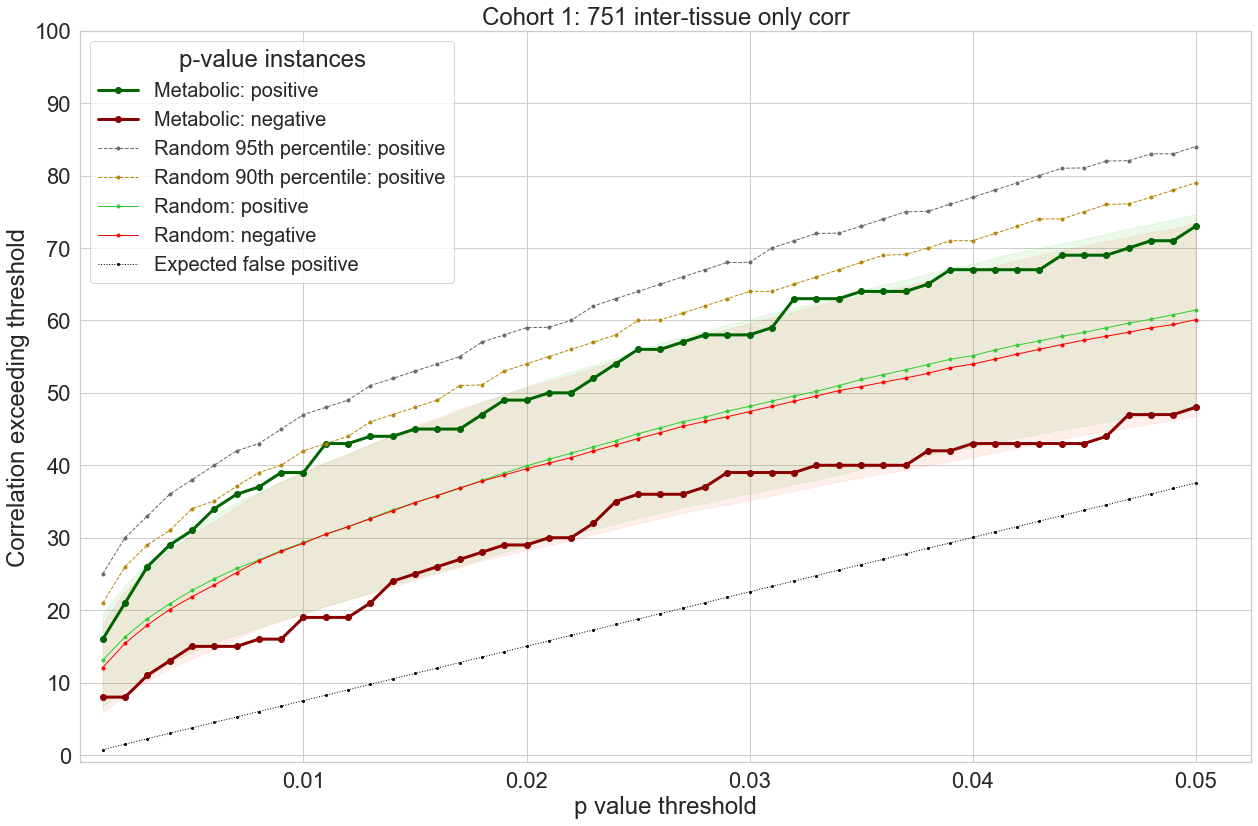

In [46]:

sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(18, 12))

plt.ylim(-1, 100)
plt.yticks([0,10,20,30,40, 50,
            60,70,80,90,100])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_pos = df_p['pos cases'].tolist()
met_neg = df_p['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile90 = quantile90['pos cases'].tolist()

random_expectation = df_p['random expectation'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')

plt.plot(x, percentile95, linewidth=1, markersize=3, linestyle='dashed',
         marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=3, linestyle='dashed',
         marker = 'o',color='darkgoldenrod')




plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=3, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=3, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')

plt.plot(x, random_expectation, linewidth=1, markersize=2, 
         marker = 'o',color='black',linestyle='dotted')
#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')


plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            
            "Random 95th percentile: positive",
            "Random 90th percentile: positive",
            
            "Random: positive",
            "Random: negative",
            
            "Expected false positive"], loc ="upper left",title="p-value instances",fontsize=20)






#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p value threshold')
plt.ylabel('Correlation exceeding threshold')
plt.title('Cohort 1: 751 inter-tissue only corr')
plt.tight_layout()
plt.savefig('3DPlus.pdf',dpi=350, format = 'pdf')


In [36]:
ratio_quantile95 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
ratio_quantile90 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [37]:
display(ratio_quantile95 )

pos cases  neg cases    ratios
corr thresholds                                
0.001                25.00      24.00  3.000000
0.002                30.00      28.05  2.301667
0.003                33.00      32.00  2.000000
0.004                36.00      35.00  1.910065
0.005                38.00      37.00  1.923077
0.006                40.00      39.00  1.875368
0.007                42.00      41.00  1.800000
0.008                43.00      43.00  1.700000
0.009                45.00      45.00  1.684615
0.010                47.00      46.00  1.684375
0.011                48.00      48.00  1.632353
0.012                49.00      49.00  1.576923
0.013                51.00      51.00  1.563221
0.014                52.00      51.00  1.562946
0.015                53.00      54.00  1.550086
0.016                54.00      55.00  1.521419
0.017                55.00      56.00  1.538622
0.018                57.00      57.00  1.484677
0.019                58.00      58.00  1.500000
0.020                59.00      59.05  1.500000
0.021                59.05      60.00  1.500000
0.022                60.00      61.00  1.500000
0.023                62.00      62.00  1.488953
0.024                63.00      63.00  1.448719
0.025                64.00      64.00  1.441340
0.026                65.00      64.00  1.461676
0.027                66.00      65.05  1.448939
0.028                67.00      67.00  1.439800
0.029                68.00      67.00  1.473913
0.030                68.00      69.00  1.466771
0.031                70.00      69.00  1.458333
0.032                71.00      70.00  1.454735
0.033                72.00      71.00  1.444444
0.034                72.05      72.00  1.444803
0.035                73.00      72.00  1.437500
0.036                74.00      73.00  1.441233
0.037                75.00      74.00  1.442561
0.038                75.05      75.00  1.451760
0.039                76.05      76.00  1.444530
0.040                77.00      76.00  1.442415
0.041                78.00      77.00  1.421429
0.042                79.00      77.00  1.420212
0.043                80.00      78.00  1.407492
0.044                81.00      79.00  1.409172
0.045                81.05      80.00  1.409470
0.046                82.00      81.00  1.409091
0.047                82.05      82.00  1.404167
0.048                83.00      82.00  1.390429
0.049                83.00      82.05  1.384876
0.050                84.00      83.00  1.384739

In [38]:
display(ratio_quantile90)

pos cases  neg cases    ratios
corr thresholds                                
0.001                 21.0       21.0  2.000000
0.002                 26.0       25.0  1.802353
0.003                 29.0       28.0  1.666667
0.004                 31.0       31.0  1.651667
0.005                 34.0       33.0  1.600000
0.006                 35.1       35.0  1.565839
0.007                 37.1       37.0  1.482000
0.008                 39.0       39.0  1.440444
0.009                 40.0       41.0  1.409091
0.010                 42.0       42.0  1.417308
0.011                 43.0       43.0  1.407407
0.012                 44.0       44.0  1.409091
0.013                 46.0       46.0  1.400741
0.014                 47.0       47.0  1.400909
0.015                 48.0       48.0  1.400541
0.016                 49.0       49.0  1.379310
0.017                 51.0       51.0  1.363636
0.018                 51.1       52.0  1.370370
0.019                 53.0       53.0  1.368616
0.020                 54.0       54.0  1.375000
0.021                 55.0       55.0  1.361364
0.022                 56.0       56.0  1.348953
0.023                 57.0       57.0  1.352941
0.024                 58.0       58.0  1.333333
0.025                 60.0       59.0  1.340594
0.026                 60.1       60.0  1.343858
0.027                 61.0       61.0  1.340474
0.028                 62.0       62.0  1.333333
0.029                 63.0       63.0  1.342998
0.030                 64.0       63.0  1.333333
0.031                 64.0       65.0  1.341528
0.032                 65.0       65.0  1.341463
0.033                 66.0       66.0  1.340529
0.034                 67.0       67.0  1.315918
0.035                 68.0       67.0  1.323529
0.036                 69.0       68.0  1.318622
0.037                 69.1       69.0  1.317073
0.038                 70.0       70.0  1.318364
0.039                 71.0       71.0  1.316915
0.040                 71.0       71.0  1.312623
0.041                 72.0       72.0  1.312146
0.042                 73.0       72.1  1.312679
0.043                 74.0       73.0  1.308173
0.044                 74.0       74.0  1.307832
0.045                 75.0       74.1  1.305556
0.046                 76.0       75.0  1.306769
0.047                 76.1       76.0  1.300189
0.048                 77.0       77.0  1.295455
0.049                 78.0       77.0  1.296454
0.050                 79.0       78.0  1.292683

In [39]:
ratio_quantile05 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.05)
ratio_quantile01 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.01)


In [40]:
display(ratio_quantile05)

pos cases  neg cases    ratios
corr thresholds                                
0.001                  5.0       3.00  0.500000
0.002                  7.0       5.00  0.590775
0.003                  8.0       7.00  0.608696
0.004                 10.0       9.00  0.608696
0.005                 11.0      10.00  0.648569
0.006                 12.0      11.00  0.666667
0.007                 13.0      12.00  0.655106
0.008                 14.0      13.00  0.646964
0.009                 15.0      14.00  0.653712
0.010                 15.0      15.00  0.657895
0.011                 16.0      16.00  0.658422
0.012                 17.0      17.00  0.666667
0.013                 18.0      17.00  0.673913
0.014                 19.0      18.00  0.686171
0.015                 20.0      19.00  0.684211
0.016                 21.0      20.00  0.685639
0.017                 22.0      21.00  0.689458
0.018                 23.0      22.00  0.692308
0.019                 23.0      22.00  0.696737
0.020                 24.0      23.00  0.700000
0.021                 25.0      23.00  0.704503
0.022                 25.0      24.00  0.707208
0.023                 26.0      25.00  0.710783
0.024                 27.0      26.00  0.720930
0.025                 28.0      26.00  0.727159
0.026                 28.0      27.00  0.734323
0.027                 29.0      28.00  0.739885
0.028                 29.0      28.00  0.734678
0.029                 30.0      29.00  0.738095
0.030                 30.0      29.00  0.738033
0.031                 31.0      29.95  0.735115
0.032                 32.0      30.00  0.733205
0.033                 32.0      31.00  0.739059
0.034                 33.0      32.00  0.749813
0.035                 34.0      32.00  0.750000
0.036                 34.0      33.00  0.746428
0.037                 35.0      33.00  0.753253
0.038                 35.0      34.00  0.756070
0.039                 36.0      35.00  0.750000
0.040                 36.0      35.00  0.752669
0.041                 37.0      35.95  0.760826
0.042                 38.0      36.00  0.763590
0.043                 38.0      37.00  0.757124
0.044                 39.0      37.00  0.756410
0.045                 39.0      38.00  0.756395
0.046                 40.0      38.00  0.759134
0.047                 40.0      39.00  0.763136
0.048                 41.0      39.00  0.764628
0.049                 41.0      39.95  0.770429
0.050                 42.0      40.00  0.769231

In [41]:
display(ratio_quantile01)

pos cases  neg cases    ratios
corr thresholds                                
0.001                 3.00       1.00  0.333214
0.002                 4.00       3.00  0.428571
0.003                 5.99       4.00  0.466444
0.004                 6.00       5.99  0.454500
0.005                 8.00       6.00  0.476190
0.006                 9.00       7.00  0.515000
0.007                 9.99       8.99  0.538220
0.008                11.00       9.00  0.523757
0.009                11.99       9.99  0.541607
0.010                12.00       9.99  0.555455
0.011                12.99      10.99  0.545417
0.012                13.00      12.00  0.558753
0.013                14.00      13.00  0.545417
0.014                15.00      13.99  0.571390
0.015                16.00      13.99  0.571303
0.016                17.00      14.00  0.571390
0.017                17.99      15.00  0.567568
0.018                18.00      16.00  0.605172
0.019                19.00      16.99  0.611047
0.020                20.00      16.99  0.611053
0.021                20.00      16.99  0.613636
0.022                21.00      17.00  0.639964
0.023                22.00      18.00  0.653799
0.024                22.00      18.99  0.653794
0.025                22.00      20.00  0.634055
0.026                23.99      20.00  0.638231
0.027                24.99      20.99  0.645073
0.028                25.00      20.99  0.642817
0.029                25.00      21.00  0.651669
0.030                25.99      21.99  0.651584
0.031                26.99      21.99  0.641488
0.032                27.00      22.00  0.647040
0.033                27.00      23.00  0.641507
0.034                28.00      23.99  0.641291
0.035                28.99      24.98  0.652123
0.036                29.00      25.99  0.659449
0.037                29.00      25.99  0.666667
0.038                30.00      26.00  0.684198
0.039                30.00      26.99  0.690357
0.040                31.00      26.99  0.689071
0.041                31.00      27.00  0.701267
0.042                31.00      27.99  0.700000
0.043                32.00      27.99  0.690897
0.044                33.00      28.99  0.692281
0.045                33.99      29.00  0.687488
0.046                34.99      30.00  0.690457
0.047                35.00      31.99  0.690457
0.048                35.00      32.00  0.693525
0.049                35.00      32.99  0.693488
0.050                35.99      33.00  0.692308

In [42]:
df_all['ratio high std'] = df_all['ratios']+  df_all['ratio std']
df_all['ratio low std'] = df_all['ratios'] -  df_all['ratio std']

In [43]:
display(df_all.head(3))

pos cases  neg cases    ratios   pos std   neg std  \
corr thresholds                                                       
0.001               13.099     12.079  1.084444  6.391874  6.211227   
0.002               16.312     15.425  1.057504  7.148689  7.145729   
0.003               18.834     17.952  1.049131  7.760584  7.694862   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.001             0.944524   6.707126   19.490874   5.867773   18.290227   
0.002             0.624663   9.163311   23.460689   8.279271   22.570729   
0.003             0.564620  11.073416   26.594584  10.257138   25.646862   

                 ratios std plus  ratios std minus  ratio high std  \
corr thresholds                                                      
0.001                   2.028968          0.139920        2.028968   
0.002                   1.682167          0.432841        1.682167   
0.003                   1.613751          0.484511        1.613751   

                 ratio low std  
corr thresholds                 
0.001                 0.139920  
0.002                 0.432841  
0.003                 0.484511

In [44]:
'''
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))

plt.ylim(0, 3.25)
plt.yticks([0,1,2,3])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_ratio = df_p['ratio'].tolist()
avg_ratio = df_all['ratios'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratio low std'].tolist()
upper_bound_ratio = df_all['ratio high std'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg",
            "Random 95th  percentile ratio: pos /neg",
            "Random 90th  percentile ratio: pos /neg"
            
            #"Random 5th percentile: negative",
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper right",title="Pos / Neg Ratio")
            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p-value threshold')
plt.ylabel('Ratio')
plt.title('Intertissue only')
plt.savefig('inter only p ratio legend',dpi=600)
'''

'\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\n\nplt.ylim(0, 3.25)\nplt.yticks([0,1,2,3])\nplt.xticks([ 0.01,0.02,0.03,\n            0.04, 0.05])\nplt.xlim(0,0.0525)\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_p[\'ratio\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratio low std\'].tolist()\nupper_bound_ratio = df_all[\'ratio high std\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\npercentile90 = ratio_quantile90[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \n\n\n\n\nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = \'o\',color=\'black\')\nplt.plot(x, perce

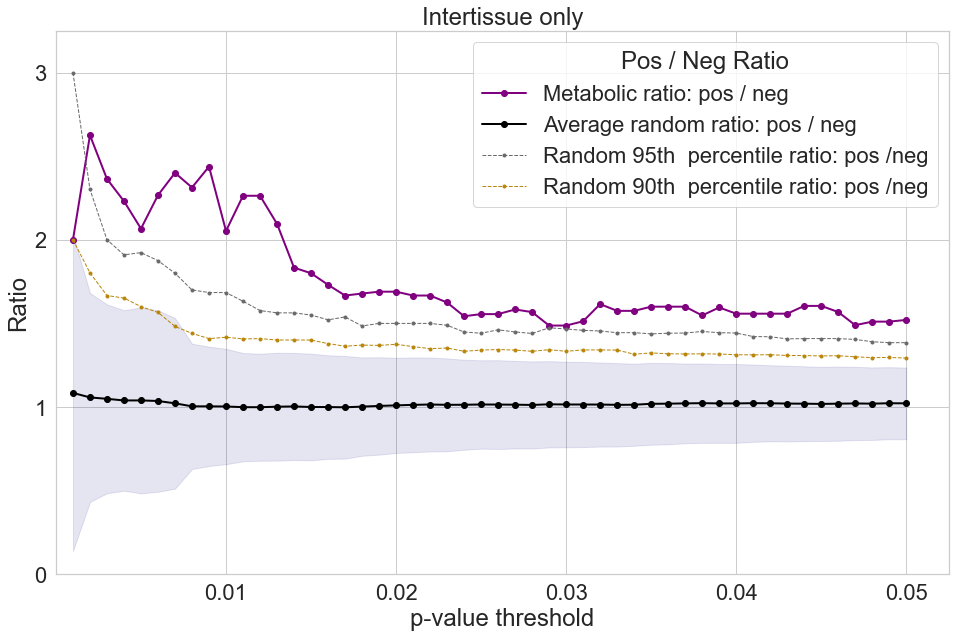

In [45]:
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))

plt.ylim(0, 3.25)
plt.yticks([0,1,2,3])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_ratio = df_p['ratio'].tolist()
avg_ratio = df_all['ratios'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratio low std'].tolist()
upper_bound_ratio = df_all['ratio high std'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=2, markersize=6, marker = 'o',color='purple')
plt.plot(x, avg_ratio, linewidth=2, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=3, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=3, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')


plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg",
            "Random 95th  percentile ratio: pos /neg",
            "Random 90th  percentile ratio: pos /neg",
            #"Random 5th percentile: negative",
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper right",title="Pos / Neg Ratio")
            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p-value threshold')
plt.ylabel('Ratio')
plt.title('Intertissue only')
plt.savefig('4DPlus.png',dpi=600)